/tmp/ipykernel_201626/3436256667.py:21: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  conc_A = np.log10(Heyptylamine.alpha(pHs)*Heyptylamine.conc)


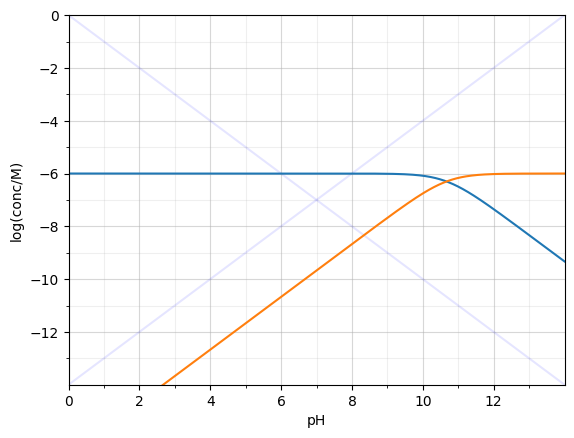

8.00336074829102


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pHcalc import Acid,Inert,System

# set acids and bases


#Heptylamine	10.67
Heyptylamine = Acid(pKa=[10.67], charge = 1, conc=1e-6)
#Heyptylamine = Acid(pKa=[10.67], charge = 1, conc=0.1)
carbonic = Acid(pKa=[6.35, 10.33], charge = 0, conc=0.1)
hydrochloric = Acid(pKa=[-1], charge=0, conc=0.00)

#initialize pH for plotting
pHs = np.linspace(0,14,1000)
conc_H = -pHs
conc_OH = -(14-pHs)

#calculate concentration from speciation
#conc_A = np.log10(carbonic.alpha(pHs)*carbonic.conc)
conc_A = np.log10(Heyptylamine.alpha(pHs)*Heyptylamine.conc)


#initialize plotting
fig, ax = plt.subplots()

#Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 14, 2)
minor_ticks = np.arange(0, 14, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(-major_ticks)
ax.set_yticks(-minor_ticks, minor=True)

ax.set_xlim((0,14))
ax.set_xlabel('pH')

ax.set_ylim((-14,0))
ax.set_ylabel('log(conc/M)')

#plot pH and pOH
ax.plot(pHs,conc_H, color="blue", alpha = 0.1)
ax.plot(pHs,conc_OH, color ='blue', alpha =0.1)

#plot the acid/base
ax.plot(pHs,conc_A)

#ax.grid(True, which="both", ls="-", color='0.65')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.show()

sys = System(Heyptylamine)
sys.pHsolve()
print(sys.pH)